# Regression Project: Steam Price Predction 

## Introduction



![image](https://user-images.githubusercontent.com/35566625/142236593-73fc6240-ed3f-42ba-b325-deba23776a21.png)

> 
>> Steam is a popular video game digital distribution service where gamers view and download games of their interest. Due to the increase in E-Sports, there are a number of games which have caught the interest of youth of this generation. Steam is home to a million games which are both Free to Play as well as purchase to play including all new releases, their ratings, reviews etc.


> ## Goals
> 
>> To predict the price of each game.



> ## Data Description

>> I will scrape data from [Steam Website](https://store.steampowered.com/search/?term=), and I will target each game data and in this project I plan to use these **target & features**:

 | Target  |  Data Type |
 | ------------- | ------------- |
 | Price  | Numerical |
 
 ----
 
 | Feature  |  Data Type |
 | ------------- | ------------- |
 | Title | Categorical |
 | Release Year  | Numerical |
 | Game Rating | Numerical |
 | Users Reviewed | Numerical |
 | Platforms | Categorical |
 | Achievements | Numerical |
 | Average Playtime | Numerical |
 | Median Playtime | Numerical |
 | Genres | Categorical |
 | Categories | Categorical |
 | owners | Categorical |
 | required_age | Numerical |
 | english | Numerical |

In [5]:
#Cleaning, EDA, and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [6]:
#Webscraping 
from bs4 import BeautifulSoup
import requests
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [7]:
#Modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

In [ ]:
chromrdriver = "C:/Users/PRABIN/Desktop/chromedriver"
os.environ["webdriver.chrome.driver"] = chromrdriver
driver = webdriver.Chrome(chromrdriver)
driver.get("https://store.steampowered.com/search/?term=")

#One can choose any number of pages to view by modifying the below parameters
#Due to computing power and time shortage, I have shown only 100 pages here
ScrollNumber = 100
for i in range(1,ScrollNumber):
    driver.execute_script("window.scrollTo(1,100)")
    time.sleep(5)

#file = open('DS.html', 'w')
#file.write(driver.page_source)
#file.close()

with open('DS.html', "w", encoding="utf-8") as f:
    f.write(driver.page_source)

driver.close()

In [ ]:
data = open('DS.html',encoding='utf-8')

In [ ]:
doc = BeautifulSoup(data, "html.parser")

In [ ]:
doc2 = BeautifulSoup(doc.prettify(),"html.parser")

In [ ]:
print(doc2)

In [ ]:
spans = doc2.find_all('span', {'class' : 'title'})
names = [span.get_text() for span in spans]
ls_names = []
for name in names:
    ls_names.append(name.strip())

In [ ]:
divs = doc2.find_all('div', {'class' : ['col search_price responsive_secondrow','col search_price discounted responsive_secondrow']})
prices = [div.get_text() for div in divs]
ls_prices = []
for price in prices:
    ls_prices.append(price.strip())

In [ ]:
divrr = doc2.find_all('div', {'class' : 'col search_released responsive_secondrow'})
release_date = [div.get_text() for div in divrr]
ls_release = []
for release in release_date:
    ls_release.append(release.strip())

In [ ]:
revs = doc2.find_all('span', {'class' : ['search_review_summary positive','search_review_summary mixed','search_review_summary negative']})

In [ ]:
print(len(ls_names))
print(len(ls_prices))
print(len(ls_release))
print(len(revs))

In [ ]:
trying = doc2.find_all('div',{'class':"col search_reviewscore responsive_secondrow"})

In [ ]:
ls = []
for i in trying:
    n = str(i).split("<")[2].split(";")
    ls.append(n)

In [ ]:
rev_list = []
for i in range(550):
    if len(ls[i])>2:
        rev_list.append(ls[i][2])
    else:
        rev_list.append('No user reviews yet')

In [ ]:
rating_rev = []
for j in rev_list:
    rating_rev.append((j[:3]))

In [ ]:
user_rev = []
for j in range(len(rev_list)):
    user_rev.append(rev_list[j].split(" ")[3])

In [115]:
games = pd.DataFrame(list(zip(ls_names,ls_prices,ls_release,rating_rev,user_rev)),
                     columns=['Title','Price','Release Date','Game Rating','Users Reviewed'])

In [116]:
games['len>12'] = games['Price'].str.len()>12

In [117]:
for a in range(len(ls_names)):
    if games['len>12'][a]==True:
        games['Price'][a] = games['Price'][a].strip()[40:]

In [118]:
games.drop(columns=['len>12'],inplace=True)

In [119]:
games

,Title,Price,Release Date,Game Rating,Users Reviewed
0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,"6,038,424"
1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,"351,931"
2,Red Dead Redemption 2,114.50 SR,"5 Dec, 2019",86%,"197,785"
3,Farming Simulator 22,179.00 SR,"21 Nov, 2021",85%,"6,973"
4,Forza Horizon 5,249.00 SR,"8 Nov, 2021",85%,"36,986"
...,...,...,...,...,...
795,NARAKA BLADEPOINT - Deluxe DLC,85.00 SR,"12 Aug, 2021",47%,342
796,Graveyard Keeper - Better Save Soul,21.95 SR,"27 Oct, 2021",50%,136
797,Total War: WARHAMMER - Call of the Beastmen,31.50 SR,"28 Jul, 2016",57%,"1,278"
798,60 Seconds! Reatomized,12.50 SR,"25 Jul, 2019",94%,"5,734"


In [120]:
games.to_csv('Complete_Games_List.csv')

<h4>I extracted 800 out of a million games available on steam. The same data is saved in a csv format.

## Data Wrangling

<h4>Now I have another csv file which I want to use it with the one I have, so I should merged them together so I can use them.

In [13]:
scrape_df = pd.read_csv('/Users/mac/Desktop/SDAIA/Regression Project/Scraped_Data.csv')


In [11]:
another_df = pd.read_csv('/Users/mac/Desktop/SDAIA/Regression Project/Steam sales data.csv')

In [14]:
scrape_df.head(5)

,Unnamed: 0,Title,Price,Release Date,Game Rating,Users Reviewed
0,0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,"6,038,424"
1,1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,"351,931"
2,2,Red Dead Redemption 2,114.50 SR,"5 Dec, 2019",86%,"197,785"
3,3,Farming Simulator 22,179.00 SR,"21 Nov, 2021",85%,"6,973"
4,4,Forza Horizon 5,249.00 SR,"8 Nov, 2021",85%,"36,986"


In [15]:
another_df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,01/11/2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,01/04/1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,01/05/2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,01/06/2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,01/11/1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [16]:
another_df['genres'].str.split(';').str[1].unique()

array([nan, 'Free to Play', 'Adventure', 'Strategy', 'Video Production',
       'RPG', 'Indie', 'Simulation', 'Casual', 'Action', 'Violent',
       'Massively Multiplayer', 'Racing', 'Gore', 'Sports',
       'Web Publishing', 'Software Training', 'Education',
       'Design & Illustration', 'Early Access', 'Utilities',
       'Photo Editing', 'Nudity', 'Audio Production',
       'Animation & Modeling', 'Game Development'], dtype=object)

### we need to take platforms column from another_df to scrape_df so we can use it in our model

In [17]:
titles= pd.DataFrame(columns=['Title','plats', 'achievements','average','median','categories','genres','owners','required_age','developer','english'])
names=pd.DataFrame(columns=['Title', 'plats','achievements','average','median','categories','genres','owners','required_age','developer','english'])

titles['Title'] = scrape_df['Title'].str[:5]
names['Title'] = another_df['name'].str[:5]
names['plats'] = another_df['platforms']
names['achievements'] = another_df['achievements']
names['categories'] = another_df['categories']
names['genres'] = another_df['genres']
names['owners'] = another_df['owners']
names['required_age'] = another_df['required_age']
names['english'] = another_df['english']
names['developer'] = another_df['developer']
names['average'] = another_df['average_playtime']
names['median'] = another_df['median_playtime']

In [18]:
titles

,Title,plats,achievements,average,median,categories,genres,owners,required_age,developer,english
0,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Red D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Farmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Forza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
795,NARAK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,Grave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,60 Se,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
names

,Title,plats,achievements,average,median,categories,genres,owners,required_age,developer,english
0,Count,windows;mac;linux,0,17612,317,Multi-player;Online Multi-Player;Local Multi-P...,Action,10000000-20000000,0,Valve,1
1,Team,windows;mac;linux,0,277,62,Multi-player;Online Multi-Player;Local Multi-P...,Action,5000000-10000000,0,Valve,1
2,Day o,windows;mac;linux,0,187,34,Multi-player;Valve Anti-Cheat enabled,Action,5000000-10000000,0,Valve,1
3,Death,windows;mac;linux,0,258,184,Multi-player;Online Multi-Player;Local Multi-P...,Action,5000000-10000000,0,Valve,1
4,Half-,windows;mac;linux,0,624,415,Single-player;Multi-player;Valve Anti-Cheat en...,Action,5000000-10000000,0,Gearbox Software,1
...,...,...,...,...,...,...,...,...,...,...,...
27070,Room,windows,7,0,0,Single-player;Steam Achievements,Adventure;Casual;Indie,0-20000,0,SHEN JIAWEI,1
27071,Cyber,windows,0,0,0,Single-player,Action;Adventure;Indie,0-20000,0,Semyon Maximov,1
27072,Super,windows,24,0,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,0-20000,0,EntwicklerX,1
27073,New Y,windows;mac,0,0,0,Single-player;Steam Cloud,Adventure;Casual;Indie,0-20000,0,Yustas Game Studio,1


In [20]:
result = pd.merge(titles, names, on="Title")

In [21]:
result = result.drop_duplicates(['Title'])

In [22]:
result

,Title,plats_x,achievements_x,average_x,median_x,categories_x,genres_x,owners_x,required_age_x,developer_x,...,plats_y,achievements_y,average_y,median_y,categories_y,genres_y,owners_y,required_age_y,developer_y,english_y
0,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows;mac;linux,0,17612,317,Multi-player;Online Multi-Player;Local Multi-P...,Action,10000000-20000000,0,Valve,1
19,Apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows,15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,Fast Travel Games,1
27,Red D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows,15,262,269,Single-player;Steam Achievements;Full controll...,Action;Indie,200000-500000,0,Panda Indie Studio;WrathSchneider,1
31,Farmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows;mac,12,0,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Simulation,50000-100000,0,Giants Software,1
58,Halo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows,75,497,570,Single-player;Online Multi-Player;Online Co-op...,Strategy,200000-500000,0,Ensemble Studios;Behaviour Interactive;343 Ind...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,Child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows,16,0,0,Single-player;Steam Achievements,Strategy;Simulation,50000-100000,0,"Tilted Mill Entertainment, Inc.",1
13888,Spelu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows,35,0,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure,0-20000,0,"Tozai Games, Inc.;O-TWO inc.",1
13889,STEIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows,42,2628,5223,Single-player;Steam Achievements;Steam Trading...,Adventure,100000-200000,0,MAGES. Inc.,1
13891,Shove,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,windows;mac;linux,85,501,611,Single-player;Local Co-op;Steam Achievements;F...,Action;Adventure;Indie,500000-1000000,0,Yacht Club Games,1


In [23]:
scrape_df['Title_s'] = scrape_df['Title'].str[:5]

In [24]:
result = result.rename(columns={'Title': 'Title_s'})

In [116]:
df = pd.merge(result, scrape_df, on="Title_s")

In [117]:
df

,Title_s,plats_x,achievements_x,average_x,median_x,categories_x,genres_x,owners_x,required_age_x,developer_x,...,owners_y,required_age_y,developer_y,english_y,Unnamed: 0,Title,Price,Release Date,Game Rating,Users Reviewed
0,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10000000-20000000,0,Valve,1,0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,"6,038,424"
1,Apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0-20000,0,Fast Travel Games,1,1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,"351,931"
2,Apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0-20000,0,Fast Travel Games,1,232,Apex Legends™ - Champion Edition,132.30 SR,"5 Nov, 2020",86%,338
3,Apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0-20000,0,Fast Travel Games,1,403,Apex Legends™ - Loba Edition,109.00 SR,"2 Nov, 2021",90%,116
4,Apex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0-20000,0,Fast Travel Games,1,584,Apex Legends™ - Octane Edition,76.30 SR,"5 Nov, 2020",89%,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50000-100000,0,"Tilted Mill Entertainment, Inc.",1,783,Children of Morta,15.98 SR,"3 Sep, 2019",91%,"8,545"
693,Spelu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0-20000,0,"Tozai Games, Inc.;O-TWO inc.",1,785,Spelunky 2,26.21 SR,"29 Sep, 2020",93%,"11,932"
694,STEIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100000-200000,0,MAGES. Inc.,1,786,STEINS;GATE,18.78 SR,"9 Sep, 2016",97%,"10,390"
695,Shove,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,500000-1000000,0,Yacht Club Games,1,792,Shovel Knight: Treasure Trove,32.97 SR,"26 Jun, 2014",96%,"11,398"


In [118]:
#Now, we going to remove some columns from our dataframe
df.drop(['Title_s', 'plats_x', 'achievements_x', 'Unnamed: 0','average_x','median_x','categories_x','genres_x','owners_x','required_age_x','developer_x','english_x'], axis=1, inplace=True)

In [119]:
df.head(5)

,plats_y,achievements_y,average_y,median_y,categories_y,genres_y,owners_y,required_age_y,developer_y,english_y,Title,Price,Release Date,Game Rating,Users Reviewed
0,windows;mac;linux,0,17612,317,Multi-player;Online Multi-Player;Local Multi-P...,Action,10000000-20000000,0,Valve,1,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,"6,038,424"
1,windows,15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,Fast Travel Games,1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,"351,931"
2,windows,15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,Fast Travel Games,1,Apex Legends™ - Champion Edition,132.30 SR,"5 Nov, 2020",86%,338
3,windows,15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,Fast Travel Games,1,Apex Legends™ - Loba Edition,109.00 SR,"2 Nov, 2021",90%,116
4,windows,15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,Fast Travel Games,1,Apex Legends™ - Octane Edition,76.30 SR,"5 Nov, 2020",89%,312


In [120]:
#I will reorder the columns 
df = df[['Title', 'Price','Release Date', 'Game Rating', 'plats_y', 'Users Reviewed', 'achievements_y','average_y','median_y','categories_y','genres_y','owners_y','required_age_y','developer_y','english_y']]

In [121]:
df.head(2)

,Title,Price,Release Date,Game Rating,plats_y,Users Reviewed,achievements_y,average_y,median_y,categories_y,genres_y,owners_y,required_age_y,developer_y,english_y
0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,windows;mac;linux,"6,038,424",0,17612,317,Multi-player;Online Multi-Player;Local Multi-P...,Action,10000000-20000000,0,Valve,1
1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,windows,"351,931",15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,Fast Travel Games,1


In [122]:
#Renaming columns
df = df.rename(columns={'Title': 'name', 'Price': 'price', 'Release Date':'release_year','Game Rating':'game_rating','plats_y':'platforms','Users Reviewed':'users_reviewed', 'achievements_y':'achievements','average_y':'average_playtime','median_y':'median_playtime','categories_y':'categories','genres_y':'genres','owners_y':'owners','required_age_y':'required_age','developer_y':'developer','english_y':'english'})

In [123]:
df.head(2)

,name,price,release_year,game_rating,platforms,users_reviewed,achievements,average_playtime,median_playtime,categories,genres,owners,required_age,developer,english
0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,windows;mac;linux,"6,038,424",0,17612,317,Multi-player;Online Multi-Player;Local Multi-P...,Action,10000000-20000000,0,Valve,1
1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,windows,"351,931",15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,Fast Travel Games,1


In [124]:
def takes_one_index(column):
    test1=[]
    for i in range(len(df[column])):
        test1.append(df[column].str.split(';').str[1][i])
    return test1

In [125]:
df['category1']=takes_one_index('categories')
df['genre']=takes_one_index('genres')
df['developer']=takes_one_index('developer')

In [126]:
df.head(5)

,name,price,release_year,game_rating,platforms,users_reviewed,achievements,average_playtime,median_playtime,categories,genres,owners,required_age,developer,english,category1,genre
0,Counter-Strike: Global Offensive,Free to Play,"21 Aug, 2012",88%,windows;mac;linux,"6,038,424",0,17612,317,Multi-player;Online Multi-Player;Local Multi-P...,Action,10000000-20000000,0,NaN,1,Online Multi-Player,NaN
1,Apex Legends™,Free to Play,"4 Nov, 2020",86%,windows,"351,931",15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,NaN,1,Steam Achievements,Adventure
2,Apex Legends™ - Champion Edition,132.30 SR,"5 Nov, 2020",86%,windows,338,15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,NaN,1,Steam Achievements,Adventure
3,Apex Legends™ - Loba Edition,109.00 SR,"2 Nov, 2021",90%,windows,116,15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,NaN,1,Steam Achievements,Adventure
4,Apex Legends™ - Octane Edition,76.30 SR,"5 Nov, 2020",89%,windows,312,15,0,0,Single-player;Steam Achievements,Action;Adventure,0-20000,0,NaN,1,Steam Achievements,Adventure


In [127]:
df['genre'].isnull().sum()

258

In [128]:
df['genre'].fillna('Indie',inplace=True)

In [129]:
df.isnull().sum()

name                  0
price                14
release_year          8
game_rating           0
platforms             0
users_reviewed        0
achievements          0
average_playtime      0
median_playtime       0
categories            0
genres                0
owners                0
required_age          0
developer           624
english               0
category1            92
genre                 0
dtype: int64

In [130]:
df.drop(columns=['categories','developer'],axis=1,inplace=True)

In [131]:
#check if there is any null value in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 696
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              697 non-null    object
 1   price             683 non-null    object
 2   release_year      689 non-null    object
 3   game_rating       697 non-null    object
 4   platforms         697 non-null    object
 5   users_reviewed    697 non-null    object
 6   achievements      697 non-null    int64 
 7   average_playtime  697 non-null    int64 
 8   median_playtime   697 non-null    int64 
 9   genres            697 non-null    object
 10  owners            697 non-null    object
 11  required_age      697 non-null    int64 
 12  english           697 non-null    int64 
 13  category1         605 non-null    object
 14  genre             697 non-null    object
dtypes: int64(5), object(10)
memory usage: 103.3+ KB


In [132]:
df['category1'].mode()

0    Multi-player
dtype: object

In [133]:
df['category1'].fillna('Multi-player',inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 696
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              697 non-null    object
 1   price             683 non-null    object
 2   release_year      689 non-null    object
 3   game_rating       697 non-null    object
 4   platforms         697 non-null    object
 5   users_reviewed    697 non-null    object
 6   achievements      697 non-null    int64 
 7   average_playtime  697 non-null    int64 
 8   median_playtime   697 non-null    int64 
 9   genres            697 non-null    object
 10  owners            697 non-null    object
 11  required_age      697 non-null    int64 
 12  english           697 non-null    int64 
 13  category1         697 non-null    object
 14  genre             697 non-null    object
dtypes: int64(5), object(10)
memory usage: 103.3+ KB


In [135]:
df = df.dropna()

### Now, after I removed the null values I will work on each column to be ready for the EDA and next phases

In [136]:
#first, price column (need to remove SR and edit Free to play to 0) so we can convert it to float
#Notice that my prices are in Saudi Riyals

df['price'] = df['price'].str.split('SR').str[0]
df['price'] = df['price'].str.strip()
df['price'] = df['price'].str.replace('Free to Play', '0')
df['price'] = df['price'].str.replace('Free To Play', '0')
df['price'] = df['price'].str.replace('Free', '0')
#Change price data type to float
df['price'] = df['price'].astype(float)

In [137]:
df['price'].head(5)

0      0.0
1      0.0
2    132.3
3    109.0
4     76.3
Name: price, dtype: float64

In [138]:
#Next, column will work on it is release_date because it is not in a date format
from datetime import datetime

df['release_year'] = pd.to_datetime(df['release_year'])
df['release_year'] = pd.DatetimeIndex(df['release_year']).year

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 696
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              676 non-null    object 
 1   price             676 non-null    float64
 2   release_year      676 non-null    int64  
 3   game_rating       676 non-null    object 
 4   platforms         676 non-null    object 
 5   users_reviewed    676 non-null    object 
 6   achievements      676 non-null    int64  
 7   average_playtime  676 non-null    int64  
 8   median_playtime   676 non-null    int64  
 9   genres            676 non-null    object 
 10  owners            676 non-null    object 
 11  required_age      676 non-null    int64  
 12  english           676 non-null    int64  
 13  category1         676 non-null    object 
 14  genre             676 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 84.5+ KB


In [140]:
df['release_year'].head(2)

0    2012
1    2020
Name: release_year, dtype: int64

In [141]:
#Ratings should be in a an interval [0-1] so we can work with it 

df['game_rating'] = df['game_rating'].map(lambda x:x.rstrip('%'))

In [142]:
df.drop(df[df['game_rating'] == 'No '].index,inplace=True)
df['game_rating'] = df['game_rating'].astype(float)

In [143]:
df['game_rating'].head(2)

0    88.0
1    86.0
Name: game_rating, dtype: float64

In [144]:
#change users_reviewed data type to integer
df['users_reviewed'] = df['users_reviewed'].str.replace(',','')
df['users_reviewed'] = df['users_reviewed'].astype(int)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 696
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              669 non-null    object 
 1   price             669 non-null    float64
 2   release_year      669 non-null    int64  
 3   game_rating       669 non-null    float64
 4   platforms         669 non-null    object 
 5   users_reviewed    669 non-null    int64  
 6   achievements      669 non-null    int64  
 7   average_playtime  669 non-null    int64  
 8   median_playtime   669 non-null    int64  
 9   genres            669 non-null    object 
 10  owners            669 non-null    object 
 11  required_age      669 non-null    int64  
 12  english           669 non-null    int64  
 13  category1         669 non-null    object 
 14  genre             669 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 83.6+ KB


In [146]:
df.head(5)

,name,price,release_year,game_rating,platforms,users_reviewed,achievements,average_playtime,median_playtime,genres,owners,required_age,english,category1,genre
0,Counter-Strike: Global Offensive,0.0,2012,88.0,windows;mac;linux,6038424,0,17612,317,Action,10000000-20000000,0,1,Online Multi-Player,Indie
1,Apex Legends™,0.0,2020,86.0,windows,351931,15,0,0,Action;Adventure,0-20000,0,1,Steam Achievements,Adventure
2,Apex Legends™ - Champion Edition,132.3,2020,86.0,windows,338,15,0,0,Action;Adventure,0-20000,0,1,Steam Achievements,Adventure
3,Apex Legends™ - Loba Edition,109.0,2021,90.0,windows,116,15,0,0,Action;Adventure,0-20000,0,1,Steam Achievements,Adventure
4,Apex Legends™ - Octane Edition,76.3,2020,89.0,windows,312,15,0,0,Action;Adventure,0-20000,0,1,Steam Achievements,Adventure


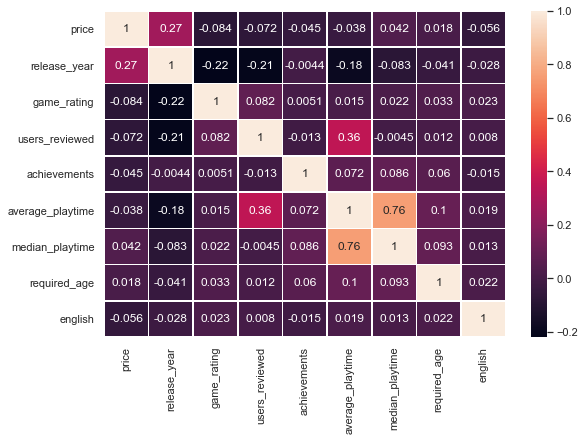

In [149]:
#Creating a heatmap to see if there is any correlation between numerical features
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax);

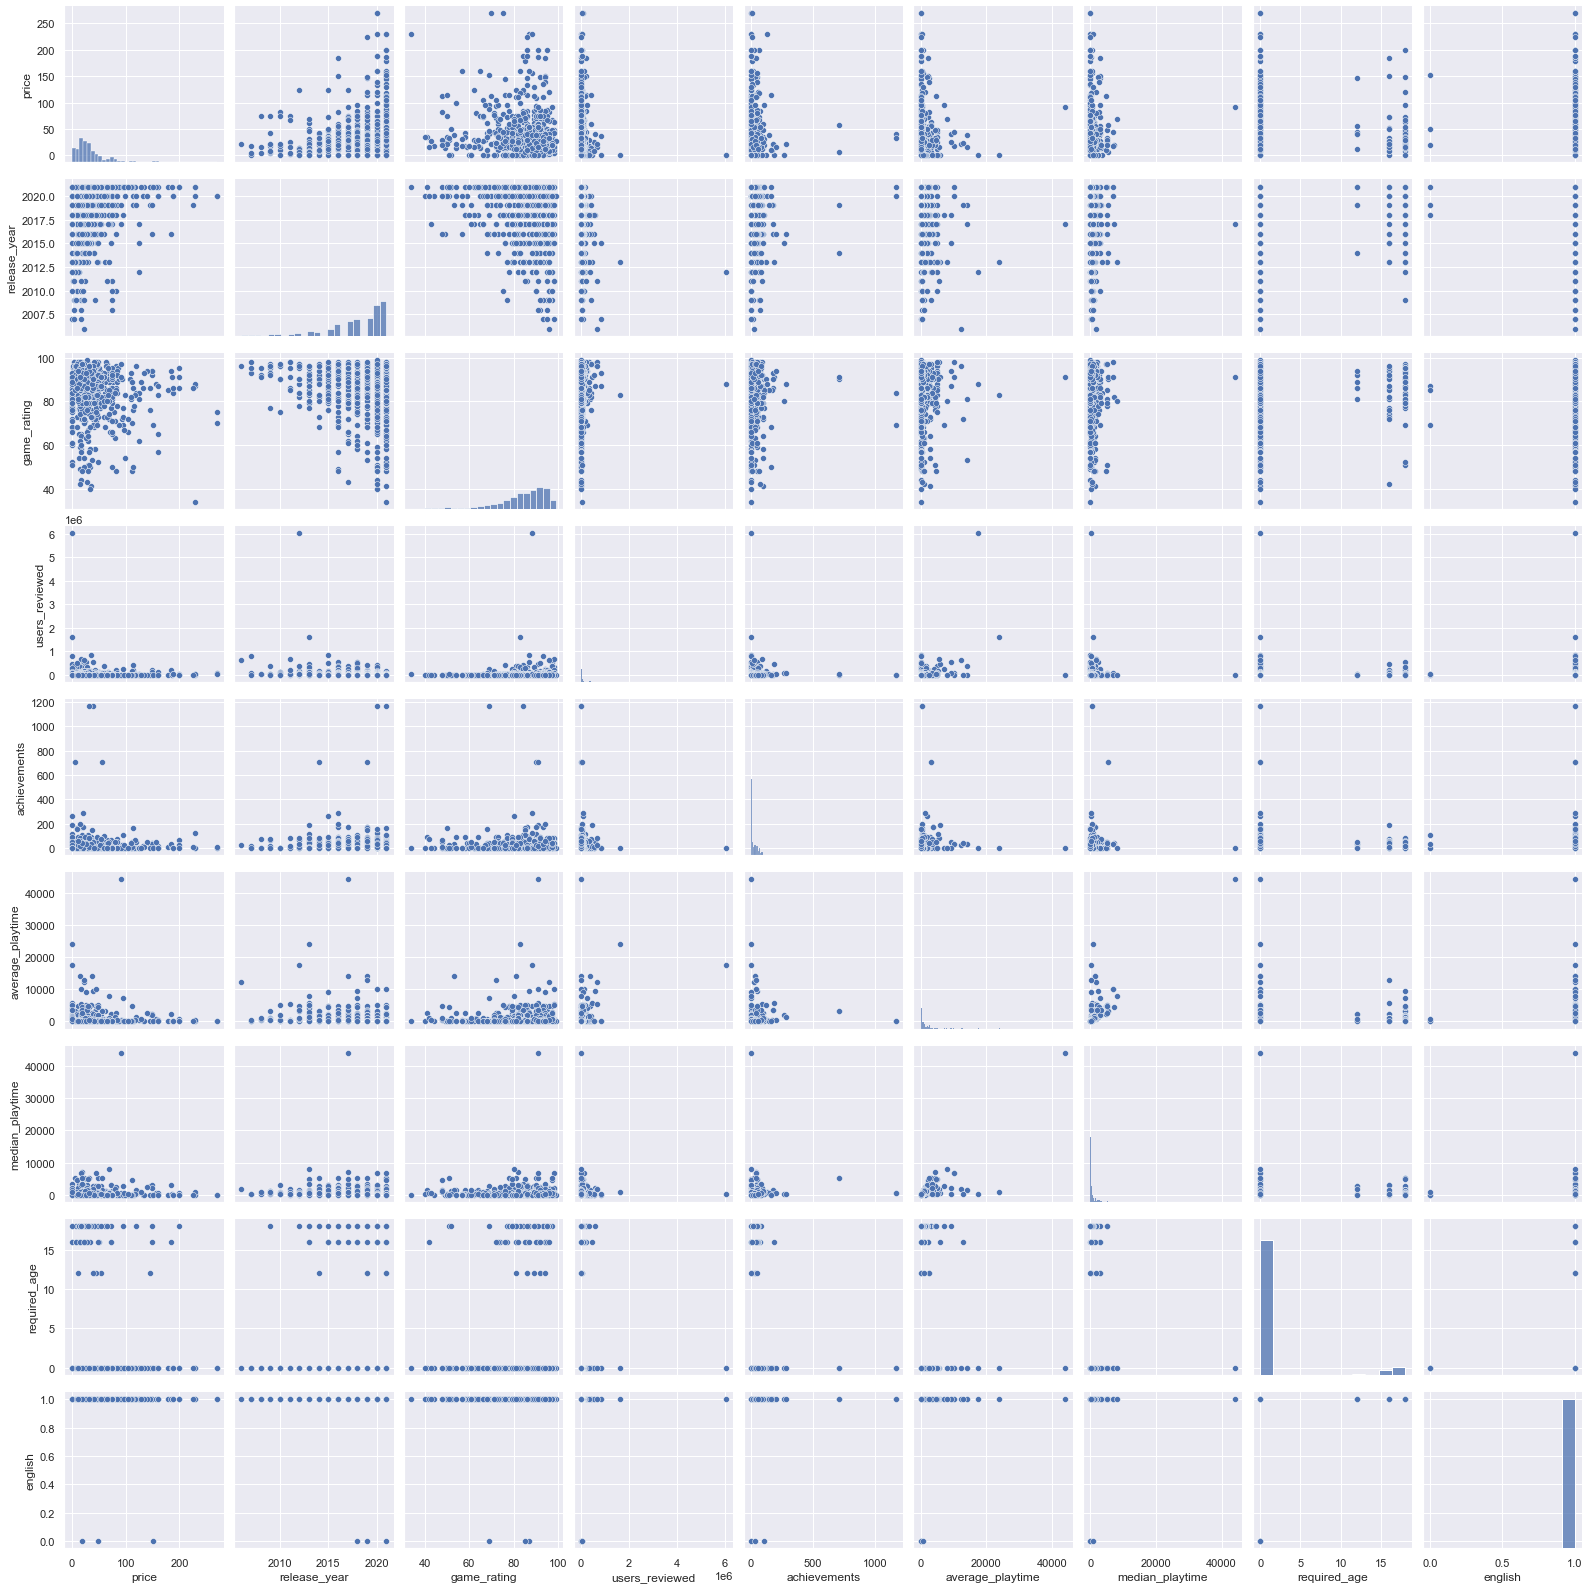

In [150]:
#Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df);

In [58]:
df=pd.get_dummies(df,columns=['platforms','category1','genre','owners'],dtype=int)

#### Thats my final dataframe that I will work on it

### I removed the null values, and change data types of some columns, now we move to EDA

## Exploratory Data Analysis

In [59]:
df.corr()

,price,release_year,game_rating,users_reviewed,achievements,average_playtime,median_playtime,required_age,english,platforms_windows,...,owners_1000000-2000000,owners_10000000-20000000,owners_100000000-200000000,owners_20000-50000,owners_200000-500000,owners_2000000-5000000,owners_20000000-50000000,owners_50000-100000,owners_500000-1000000,owners_5000000-10000000
price,1.000000,0.266813,-0.084116,-0.071753,-0.044884,-0.038398,0.041827,0.017925,-0.055668,0.088054,...,0.003355,-0.091426,-0.038663,-0.008037,0.084426,-0.065521,-0.038663,-0.053828,-0.018416,-0.101530
release_year,0.266813,1.000000,-0.219790,-0.209248,-0.004381,-0.182037,-0.082547,-0.041062,-0.027693,0.060252,...,-0.028637,-0.231538,-0.066627,0.055546,-0.044076,-0.149009,-0.066627,0.077201,-0.071517,-0.179063
game_rating,-0.084116,-0.219790,1.000000,0.082149,0.005121,0.014547,0.021561,0.033368,0.022638,-0.037660,...,-0.063277,0.057968,-0.003970,0.081301,-0.012305,-0.027349,0.023271,-0.044037,0.027609,0.079893
users_reviewed,-0.071753,-0.209248,0.082149,1.000000,-0.013392,0.355271,-0.004493,0.011687,0.008017,-0.087682,...,-0.033067,0.420218,0.235992,-0.010485,-0.018489,-0.007000,0.060095,-0.032738,-0.034736,0.084496
achievements,-0.044884,-0.004381,0.005121,-0.013392,1.000000,0.071554,0.086411,0.060300,-0.014591,-0.009479,...,0.098526,0.013975,-0.014139,-0.061930,-0.047582,0.039434,0.075583,-0.066711,0.075869,0.075665
average_playtime,-0.038398,-0.182037,0.014547,0.355271,0.071554,1.000000,0.761159,0.102642,0.019036,-0.155796,...,0.040120,0.196981,0.340458,-0.107388,-0.070851,0.058703,0.072524,-0.094290,0.030027,0.234111
median_playtime,0.041827,-0.082547,0.021561,-0.004493,0.086411,0.761159,1.000000,0.093235,0.012829,-0.027204,...,0.057755,-0.006671,0.002946,-0.096747,-0.012190,0.011620,-0.005046,-0.078298,0.099916,0.033005
required_age,0.017925,-0.041062,0.033368,0.011687,0.060300,0.102642,0.093235,1.000000,0.021694,0.164832,...,0.177694,-0.033238,-0.012506,-0.098644,-0.005419,0.028203,0.112836,-0.079131,0.074796,0.072121
english,-0.055668,-0.027693,0.022638,0.008017,-0.014591,0.019036,0.012829,0.021694,1.000000,-0.004172,...,0.030096,0.006902,0.002597,0.020483,0.026291,0.021450,0.002597,0.020483,0.025605,0.013764
platforms_windows,0.088054,0.060252,-0.037660,-0.087682,-0.009479,-0.155796,-0.027204,0.164832,-0.004172,1.000000,...,0.013999,-0.075061,-0.051229,0.052369,0.021300,-0.240947,0.029222,0.052369,0.166815,-0.208356


In [1019]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 696
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   name                                  669 non-null    object 
 1   price                                 669 non-null    float64
 2   release_year                          669 non-null    int64  
 3   game_rating                           669 non-null    float64
 4   users_reviewed                        669 non-null    int64  
 5   achievements                          669 non-null    int64  
 6   average_playtime                      669 non-null    int64  
 7   median_playtime                       669 non-null    int64  
 8   genres                                669 non-null    object 
 9   required_age                          669 non-null    int64  
 10  english                               669 non-null    int64  
 11  platforms_windows  

In [69]:
df.drop('genres',axis=1,inplace=True)

## import for modeling

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import preprocessing
from sklearn.linear_model import LassoCV, RidgeCV 
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### first, we will seperate the features from our target

In [71]:
#with dummies
X = df.drop(columns=['name','price'],axis=1)

y = df['price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [88]:
#RMSE & MAE functions

def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

### Linear Regression

In [73]:
# fit linear regression to training data
lr1_model = LinearRegression()
lr1_model.fit(X_train, y_train)
print(f'Linear Regression for test R^2: {lr1_model.score(X_train, y_train)}')
val_score = lr1_model.score(X_test, y_test)
print(f'Linear Regression for test R^2: {val_score}')

Linear Regression for test R^2: 0.18264446887076702
Linear Regression for test R^2: 0.04503573398365246


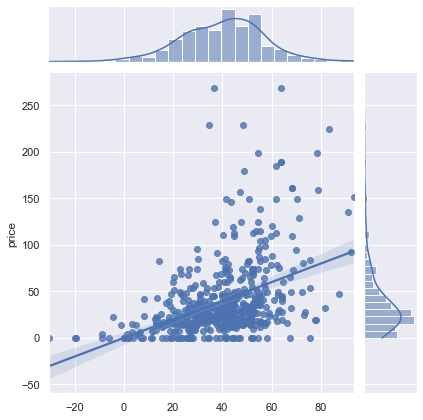

In [74]:
train_pred  = lr1_model.predict(X_train)
sns.jointplot(x=train_pred,y=y_train,kind='reg');

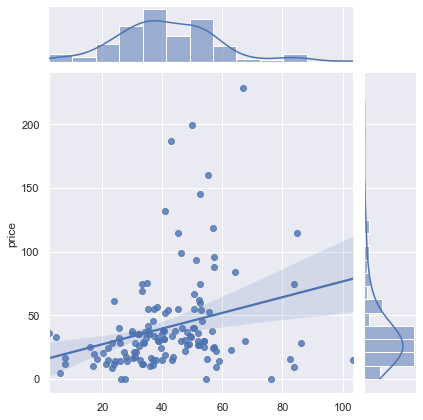

In [76]:
test_pred = lr1_model.predict(X_test)
sns.jointplot(x=test_pred,y=y_test,kind='reg');

### Ridge Regression

In [114]:
#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=10000)
#validate
lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')

Ridge Regression val R^2: 0.024


In [115]:
lm_reg = Ridge(alpha=10000)
#test
lm_reg.fit(X_test_scaled, y_tes)
print(f'Ridge Regression val R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression val R^2: 0.013


### Random Forrest Regression

In [99]:
rfg = RandomForestRegressor()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
rfg.fit(X_train_scaled,y_train)
print(f'Random Forrest Regression for Training R^2: {rfg.score(X_train_scaled,y_train):.3f}')

Random Forrest Regression for Training R^2: 0.890


In [100]:
rfg = RandomForestRegressor()
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
rfg.fit(X_test_scaled,y_test)
print(f'Random Forrest Regression for Testing R^2: {rfg.score(X_test_scaled,y_test):.3f}')

Random Forrest Regression for Testing R^2: 0.882


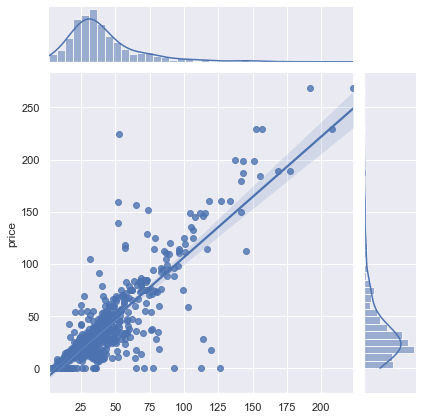

In [101]:
rfg = RandomForestRegressor() 
rfg.fit(X_train,y_train)
preds = rfg.predict(X) # generate predictions (on training data) using fit model
sns.jointplot(x=preds,y=y, kind='reg')

### MSE, RMSE, and MAE for our best model (Random Forest Regression)

In [107]:
rfg.fit(X_train, y_train)
y_pred_train=rfg.predict(X_train)
y_pred_val=rfg.predict(X_val)
y_pred_test=rfg.predict(X_test)

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

MSE = mean_squared_error(y_pred_val, y_val, squared=True)
print('Mean Square Error = ', MSE)

RMSE = mean_squared_error(y_pred_val,y_val, squared=False)
print ('Root Mean Square Error =', RMSE)

MAE = mean_absolute_error(y_pred_val,y_val)
print ('Mean Absoluter Error=', MAE)

Mean Square Error =  1385.0406909248802
Root Mean Square Error = 37.21613481979127
Mean Absoluter Error= 26.202058333333326


### Gradient Boosting Regression

In [110]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
print(f'Gardient Boosting Regression for Training R^2: {gbm.score(X_train,y_train):.2f}')

Gardient Boosting Regression for Training R^2: 0.67


In [111]:
gbm = GradientBoostingRegressor()
gbm.fit(X_test, y_test)
print(f'Gardient Boosting Regression for Tesing R^2: {gbm.score(X_test,y_test):.2f}')

Gardient Boosting Regression for Tesing R^2: 0.91


### we can see here there is an overlap because testing set R^2 is higher than training set R^2

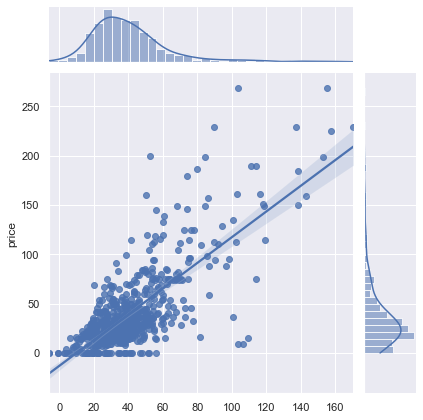

In [83]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train,y_train)
preds = gbm.predict(X) # generate predictions (on training data) using fit model
sns.jointplot(x=preds,y=y, kind='reg')

In [1170]:
#RMSE and MAE for Random Forest Regression

print(f'RMSE is: {RMSE(y,predc)}')
print(f'MAE is: {MAE(y,predc)}')

RMSE is: 46.60167918543585
MAE is: 31.14333714285714


In [1068]:
#lasso model for regularization
lasso_model = Lasso(alpha =500) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train, y_train)

Lasso(alpha=500)

## Conclusion

### Since the Random Forrest Regression model has the maximum R^2 between the models, I will choose it.

## Save Model

In [94]:
import pickle

In [95]:
data = pd.concat([X_test, y_test], axis=1, copy=True)

In [96]:
with open('Model.pickle', 'wb') as to_write:
    pickle.dump(data, to_write)